In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import os
# from matplotlib.pyplot import plt


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32 # 32 original

# train_dir = '/content/drive/My Drive/Code_Project/college/junior/dataset/trainedge'
# val_dir = '/content/drive/My Drive/Code_Project/college/junior/dataset/valedge'

train_dir = '/mnt/c/Users/jone9/Documents/Code_Project/college/junior/Topic/dataset/trainedge'
val_dir = '/mnt/c/Users/jone9/Documents/Code_Project/college/junior/Topic/dataset/valedge'

print(train_dir)
# print(os.listdir(train_dir))  # 應該顯示類別資料夾

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    batch_size=32,
    image_size=IMAGE_SIZE,
    shuffle=True
)

val_generator = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    label_mode='categorical',
    batch_size=32,
    image_size=IMAGE_SIZE,
    shuffle=False
)


/mnt/c/Users/jone9/Documents/Code_Project/college/junior/Topic/dataset/trainedge
Found 13213 files belonging to 3 classes.


I0000 00:00:1762269215.946685    3906 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5561 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Found 1449 files belonging to 3 classes.


In [3]:
num_classes = len(train_generator.class_names)

# 加入 prefetch：並行 CPU 資料準備 + GPU 訓練
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_generator.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_generator.prefetch(buffer_size=AUTOTUNE)


In [4]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # 先凍結權重


In [5]:
x = base_model.output
x = GlobalAveragePooling2D()(x)  # 比 Flatten 更穩定
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


In [6]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
import sys
print(sys.executable)


/home/handsomeguy/anaconda3/envs/py310/bin/python


In [8]:
history = model.fit(
    train_generator,
    epochs=10, # 10 epochs original
    validation_data=val_generator
)

Epoch 1/10


I0000 00:00:1749700429.858366   41624 service.cc:152] XLA service 0x779a6800f100 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749700429.858452   41624 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-06-12 11:53:49.944034: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1749700430.876478   41624 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-06-12 11:53:56.468503: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_742', 188 bytes spill stores, 188 bytes spill loads

2025-06-12 11:53:57.839543: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusi

412/413 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.6485 - loss: 1.8217

2025-06-12 11:56:03.115399: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_742', 200 bytes spill stores, 200 bytes spill loads

2025-06-12 11:56:03.818623: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_742', 4 bytes spill stores, 4 bytes spill loads

2025-06-12 11:56:09.751398: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1664', 56 bytes spill stores, 56 bytes spill loads

2025-06-12 11:56:09.907859: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1664', 32 bytes spill stores, 32 bytes spill loads

2025-06-12 11:56:09.964165: I external/loc

413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.6488 - loss: 1.8196

2025-06-12 11:56:42.355459: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_257', 8 bytes spill stores, 8 bytes spill loads

2025-06-12 11:56:48.284766: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_257', 104 bytes spill stores, 104 bytes spill loads



413/413 ━━━━━━━━━━━━━━━━━━━━ 188s 380ms/step - accuracy: 0.6491 - loss: 1.8176 - val_accuracy: 0.9351 - val_loss: 0.1999
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 92s 221ms/step - accuracy: 0.9019 - loss: 0.3135 - val_accuracy: 0.9503 - val_loss: 0.1308
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 101s 242ms/step - accuracy: 0.9253 - loss: 0.2102 - val_accuracy: 0.9531 - val_loss: 0.1142
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 100s 242ms/step - accuracy: 0.9424 - loss: 0.1583 - val_accuracy: 0.9572 - val_loss: 0.1028
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 103s 247ms/step - accuracy: 0.9528 - loss: 0.1275 - val_accuracy: 0.9607 - val_loss: 0.0961
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 99s 237ms/step - accuracy: 0.9530 - loss: 0.1166 - val_accuracy: 0.9620 - val_loss: 0.0878
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 96s 232ms/step - accuracy: 0.9584 - loss: 0.1057 - val_accuracy: 0.9683 - val_loss: 0.0857
Epoch 8/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 97s 234ms/step - accuracy: 0.9616 - loss: 0.0968 -

In [9]:
# 解凍最後 4 層
for layer in base_model.layers[-4:]:
    layer.trainable = True

# 使用更小的學習率以免破壞已學特徵
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 再訓練幾個 epoch
history_finetune = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)


Epoch 1/5


2025-06-12 12:12:00.980971: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1431', 12 bytes spill stores, 16 bytes spill loads

2025-06-12 12:12:01.314803: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1431', 4 bytes spill stores, 4 bytes spill loads



412/413 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.9772 - loss: 0.0672

2025-06-12 12:13:29.483176: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1431', 4 bytes spill stores, 4 bytes spill loads

2025-06-12 12:13:30.261789: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1431', 8 bytes spill stores, 8 bytes spill loads



413/413 ━━━━━━━━━━━━━━━━━━━━ 128s 241ms/step - accuracy: 0.9772 - loss: 0.0672 - val_accuracy: 0.9876 - val_loss: 0.0360
Epoch 2/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 87s 210ms/step - accuracy: 0.9934 - loss: 0.0203 - val_accuracy: 0.9938 - val_loss: 0.0217
Epoch 3/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 86s 208ms/step - accuracy: 0.9963 - loss: 0.0121 - val_accuracy: 0.9952 - val_loss: 0.0208
Epoch 4/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 86s 208ms/step - accuracy: 0.9986 - loss: 0.0034 - val_accuracy: 0.9945 - val_loss: 0.0231
Epoch 5/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 86s 208ms/step - accuracy: 0.9994 - loss: 0.0022 - val_accuracy: 0.9917 - val_loss: 0.0238


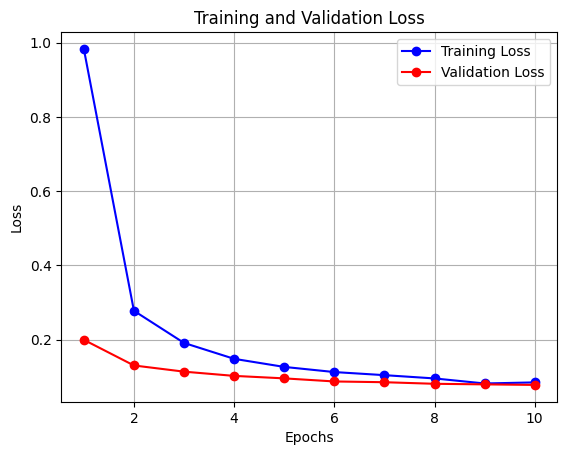

In [20]:
# 取得 loss 數據
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# 畫圖
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
model.save("/mnt/c/Users/jone9/Documents/Code_Project/college/junior/Topic/model/vgg19_transfer_model.h5")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 904ms/step
預測類別：other
把握度（信心值）：100.00%


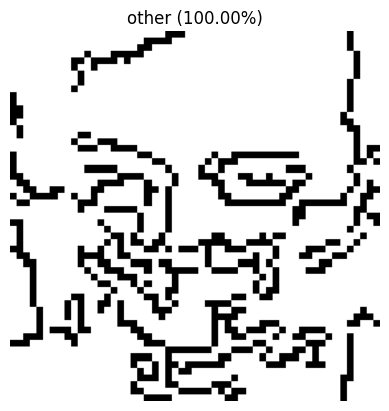

0.0 255.0


In [10]:
from tensorflow.keras.preprocessing import image
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 圖片路徑
img_path = "/mnt/c/Users/jone9/Documents/Code_Project/college/junior/Topic/dataset/trainedge/other/28.png"

# 載入圖片並預處理
img = image.load_img(img_path, target_size=IMAGE_SIZE)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
# x = x / 255.0

# 載入模型
model = keras.models.load_model("/mnt/c/Users/jone9/Documents/Code_Project/college/junior/Topic/model/vgg19_transfer_model.h5")

# 預測
pred = model.predict(x)
predicted_class_idx = np.argmax(pred, axis=1)[0]
confidence = np.max(pred)

# 類別對照表（來自 train_generator）
class_names = train_generator.class_names
predicted_class_name = class_names[predicted_class_idx]

# 輸出預測結果
print(f"預測類別：{predicted_class_name}")
print(f"把握度（信心值）：{confidence:.2%}")  # 百分比格式

# 顯示圖片與標籤
plt.imshow(img)
plt.title(f"{predicted_class_name} ({confidence:.2%})")
plt.axis('off')
plt.show()

for images, labels in train_generator.take(1):
    print(images.numpy().min(), images.numpy().max())
